In [1]:
## SMOTE is a useful technique when dealing with imbalanced classes
## This tutorial generates test data and improves classification using SMOTE
## Tutorial url:
## https://towardsdatascience.com/applying-smote-for-class-imbalance-with-just-a-few-lines-of-code-python-cdf603e58688

In [2]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Generate test data

In [3]:
X, y = make_classification(n_classes=2, class_sep=0.5,
weights=[0.05, 0.95], n_informative=2, n_redundant=0, flip_y=0,
n_features=2, n_clusters_per_class=1, n_samples=1000, random_state=10)

In [4]:
## confirm counts
unique, counts = np.unique(y, return_counts=True)

np.asarray((unique, counts)).T

array([[  0,  50],
       [  1, 950]], dtype=int64)

C:\Users\liamk\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


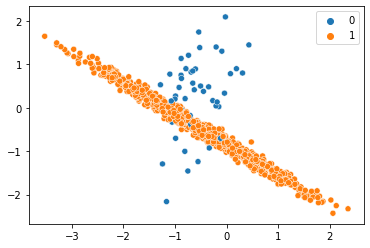

In [5]:
sns.scatterplot(X[:, 0], X[:, 1], hue=y)

plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(750, 2) (250, 2) (750,) (250,)


## Log Reg on imbalanced data

In [7]:
logreg = LogisticRegression()

logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

In [8]:
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[  5   5]
 [  0 240]]


              precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.98      1.00      0.99       240

    accuracy                           0.98       250
   macro avg       0.99      0.75      0.83       250
weighted avg       0.98      0.98      0.98       250



## SMOTE

In [9]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [10]:
## counts after SMOTE
unique, counts = np.unique(y_res, return_counts=True)

np.asarray((unique, counts)).T

array([[  0, 710],
       [  1, 710]], dtype=int64)

C:\Users\liamk\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


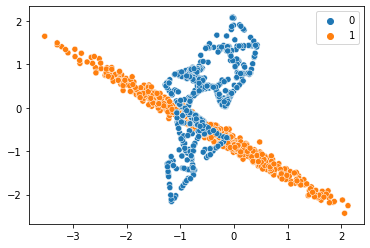

In [11]:
sns.scatterplot(X_res[:, 0], X_res[:, 1], hue=y_res)

plt.show()

In [12]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(
    X_res, y_res, test_size=0.25, random_state=42)

print(X_train_res.shape, X_test_res.shape, y_train_res.shape, y_test_res.shape)

(1065, 2) (355, 2) (1065,) (355,)


## Log Reg on SMOTE data

In [13]:
logreg_res = LogisticRegression()

logreg_res.fit(X_train_res,y_train_res)

y_pred_res = logreg_res.predict(X_test)

In [14]:
print(f"Number of 0's in y_test: {np.count_nonzero(y_test == 0)}")

Number of 0's in y_test: 10


In [15]:
## confusion matrix + classification report after SMOTE
## We see a big improve for classifying 0's, at the cost misclassifying 1's
print(confusion_matrix(y_test, y_pred_res))
print('\n')
print(classification_report(y_test, y_pred_res))

[[  9   1]
 [ 34 206]]


              precision    recall  f1-score   support

           0       0.21      0.90      0.34        10
           1       1.00      0.86      0.92       240

    accuracy                           0.86       250
   macro avg       0.60      0.88      0.63       250
weighted avg       0.96      0.86      0.90       250



In [16]:
## confusion matrix + classification report pre-SMOTE for comparison
## low classification of 0's shows how the model is overwhelmed by the majority class
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.98      1.00      0.99       240

    accuracy                           0.98       250
   macro avg       0.99      0.75      0.83       250
weighted avg       0.98      0.98      0.98       250



In [17]:
## Additional notes:

## SMOTE works by selecting pair of minority class observations and then creating a synthetic point
## that lies on the line connecting these two. It is pretty liberal about selecting the minority 
## points and may end up picking up minority points that are outliers.

## ADASYN, BorderLine SMOTE, KMeansSMOTE, SVMSMOTE are some of the strategies 
## to select better minority points.

## Visualising original and SMOTE data

In [19]:
X_new = X.copy()
y_new = y.copy()

X_new = np.concatenate((X_new[y_new == 0], X_res))
y_new = np.concatenate((np.array(['minority data'] * len(y_new[y_new == 0])), y_res))

y_new = np.where(y_new == '1', 'majority data', y_new)
y_new = np.where(y_new == '0', 'SMOTE data', y_new)

print(len(X_new), len(y_new))

1470 1470


C:\Users\liamk\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


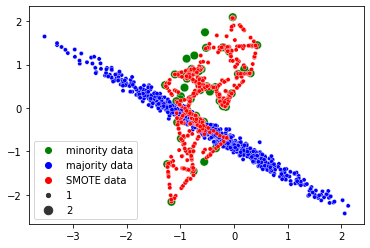

In [32]:
palette = {'minority data': 'green', 'SMOTE data': 'red', 'majority data': 'blue'}
size = np.concatenate((np.array([2] * len(y[y == 0])), np.array([1] * len(y_res))))

sns.scatterplot(X_new[:, 0], X_new[:, 1], hue=y_new, palette=palette, size=size)

plt.show()